Philip McCormick

MSDS-598: Modeling 1

February 14, 2022

Lab 2

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


df_penguins = sns.load_dataset('penguins')
df_penguins.dropna(inplace=True)

df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))

df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


In [ ]:
!pip install matplotlib==3.5

1. Create a scatter plot with flipper length on the x-axis and body mass on the y-axis. Color the points according to the penguin's sex.


<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

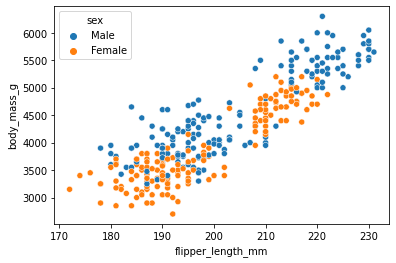

In [23]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue='sex', data=df_penguins)

2. Find the line of best fit for the penguins dataset to predict body mass from flipper length. Plot this on the plot from Q1.

In [42]:
model = ols(formula = 'body_mass_g ~ flipper_length_mm + is_male', data=df_penguins)
res = model.fit()

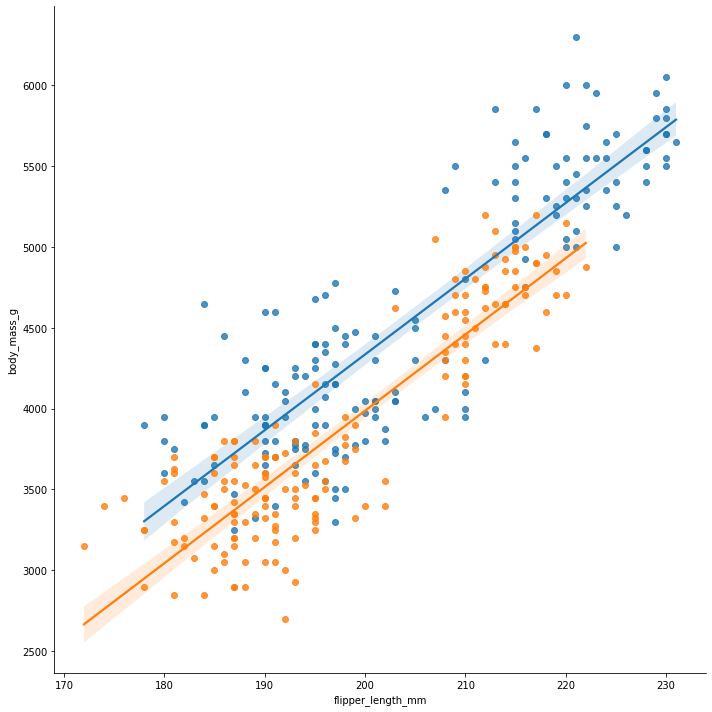

In [44]:
model1 = sns.FacetGrid(df_penguins, hue='sex', height= 10)
model1.map(sns.regplot, 'flipper_length_mm', 'body_mass_g')

3. Find two lines of best fit: one for the male and one for the female penguins. Plot this on the plot from Q1.

In [26]:
male = df_penguins[df_penguins['is_male']==1] 
female = df_penguins[df_penguins['is_male']==0]

In [29]:
model2 = ols(formula = 'body_mass_g ~ flipper_length_mm', data=male) 
resm = model2.fit()  
 
model3 = ols(formula = 'body_mass_g ~ flipper_length_mm', data=female) 
resf = model3.fit() 

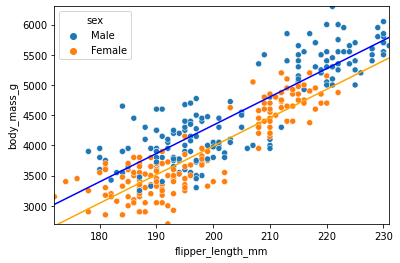

In [31]:
b, m = resm.params 
 
c, n = resf.params 
 
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=df_penguins, hue='sex')

plt.axline((0, b), slope=m, color='blue') 
plt.axline((0, c), slope=n, color='orange') 
 
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm'])) 
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g'])) 
plt.show() 

4. Take the line of best fit from above which used both flipper length and ```is_male```. Plot this line with $X_{is\_male}=0$ and with $X_{is\_male}=1$. What do you notice?

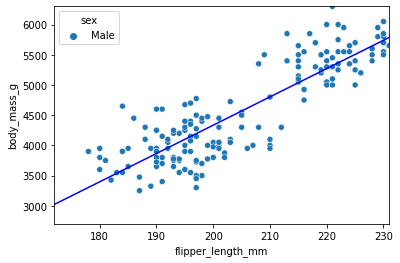

In [48]:
# Male
b, m = resm.params 
  
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=male, hue='sex') 
 
plt.axline((0, b), slope=m, color='blue')
  
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm'])) 
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g'])) 
plt.show()

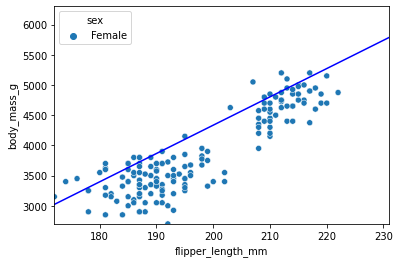

In [51]:
#Female
sns.scatterplot(x='flipper_length_mm',y='body_mass_g',data=female, hue='sex') 
  
plt.axline((0, b), slope=m, color='blue') 
  
plt.xlim(min(df_penguins['flipper_length_mm']), max(df_penguins['flipper_length_mm'])) 
plt.ylim(min(df_penguins['body_mass_g']), max(df_penguins['body_mass_g'])) 
plt.show()

It looks like the line of best fit is more accurate for the male data. Most observations for the female data fall under the line of best fit.